<a href="https://colab.research.google.com/github/carloslme/handson-ml2-book/blob/main/04_Training_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

***ŷ = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn***

Where:
* ŷ is the predicted value. 
* n is the number of features. 
* xi is the ith feature value. 
* θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).

Or written as vectorized form:

***ŷ=hθ(x)=θ·x***

In this equation:
* θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
* x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
* θ·x is the dot product of the vectors θ and x , which is of course equal to θ0x0 + θ1x1 + θ2x2 + ⋯ + θnxn.
* hθ is the hypothesis function, using the model parameters θ.

**Note**

In ML, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If **θ** and **x** are column vectors, then the prediction is ***ŷ=θ⊺x***, where θ⊺ is the transpose of θ (a row vector instead of a column vector) and θ⊺x is the matrix multiplication of θ⊺ and x. It is of course the same prediction, except that it is now represented as a single-cell matrix rather than a scalar value. 

To train a Linear Regression model, we need to find the value of of **θ** that minimizes the Root Mean Square Error (RMSE). In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

## The MSE cost function of a Linear Regression model
The MSE hypothesis ***hθ*** on a training set **X** is calculated using this equation:

***MSE(X, hθ) = 1m ∑i = 1m(θ⊺x(i)-y(i))2***

In this equation:
* ***m*** is the number of instances in the dataset you are measuring the RMSE on. For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
* x(i) is a vector of all the feature values (excluding the label) of the i th instance in the dataset, and y(i) is its label (the desired output value for that instance).


> For example, if the first district in the dataset is located at longitude –118.29°, latitude 33.91°, and it has 1,416 inhabitants with a median income of \$38,372, and the median house value is \$156,400 (ignoring the other features for now), then: 
* x(1) = -118.29 33.91 1,416 38,372
* y(1) = 156,400

* ***X*** is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance, and the i th row is equal to the transpose of ***x(i)***, noted ***(x(i))⊺***

> * For example, if the first district is as just described, then the matrix X looks like this: X = ( x ( 1 ) ) ⊺ ( x ( 2 ) ) ⊺ ⋮ ( x ( 1999 ) ) ⊺ ( x ( 2000 ) ) ⊺ = - 118.29 33.91 1,416 38,372 ⋮ ⋮ ⋮ ⋮

* ***hθ*** is your system’s prediction function, also called a hypothesis . When your system is given an instance’s feature vector ***x(i)***, it outputs a predicted value ŷ(i) = h(x(i)) for that instance (ŷ is pronounced “y-hat”). 
> * For example, if your system predicts that the median housing price in the first district is \$158,400, then ŷ(1) = h(x(1)) = 158,400. The prediction error for this district is ŷ (1) – y(1) = 2,000.

* RMSE(**X**, h) is the cost function measured on the set of examples using your hypothesis h.


To simplify notations, we will just write MSE(θ) instead of MSE(**X**, hθ).



## The Normal Equation

To find the value of **θ** that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly called *Normal Equation*:

***θ^ = (X⊺X) - 1X⊺y***

In this equation:
* **θ^** is the value of θ that minimizes the cost function.
* **y** is the vector of target values containing ***y(1)*** to ***y(m)***.

Let's generate some linear-looking data 

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


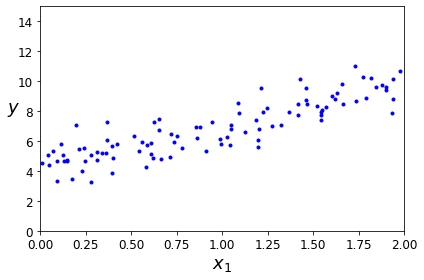

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

*Plot with randomly generated linear dataset*

Computing the θ^ using the Normal Equation. The `inv()` function to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function used was to generate the data y=4+3x1+Gaussian noise.

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

We got for θ0=3.97 and θ1=3.14 instead of θ0=4 and θ1=3 because of the noise made it impossible to recover the exact parameters of the original function.

Next make predictions using θ^:

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

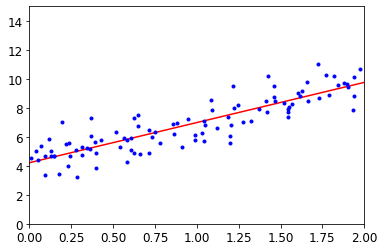

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


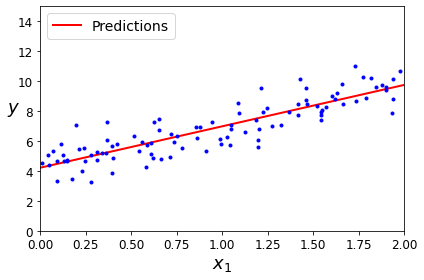

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## Performing Linear Regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes θ^ = X + y , where 𝐗+ is the *pseudoinverse* of X (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ V ⊺ (see numpy.linalg.svd() ). The pseudoinverse is computed as X + = V Σ + U ⊺ . To compute the matrix Σ + , the algorithm takes Σ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix X ⊺ X is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

# Computational Complexity
The Normal Equation computes the inverse of X⊺X, which is an ( n + 1) × ( n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about *O*(n^2.4) to *O*(n^3), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

The SVD approach used by Scikit-Learn’s `LinearRegression` class is about *O*(n^2). If you double the number of features, you multiply the computation time by roughly 4.

**Warning**

Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, **both are linear with regard to the number of instances in the training set (they are *O*(m))**, so they handle large training sets efficiently, provided they can fit in memory.

Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: **the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features**. In other words, making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.


# Gradient Descent
*Gradient Descent* is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent **is to tweak parameters iteratively in order to minimize a cost function.** It measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

Concretely, you start by filling θ with random values (this is called *random initialization*). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum.

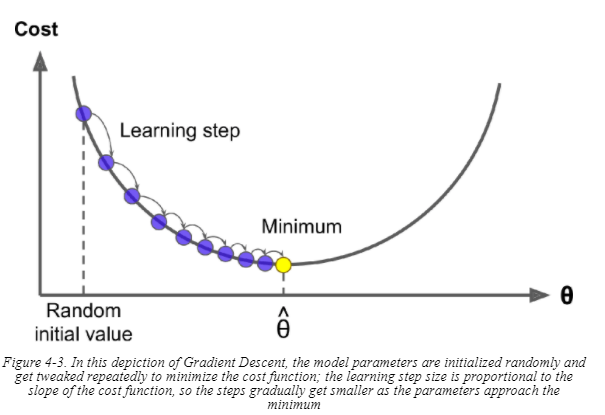





An important parameter in Gradient Descent is the *size of the steps*, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

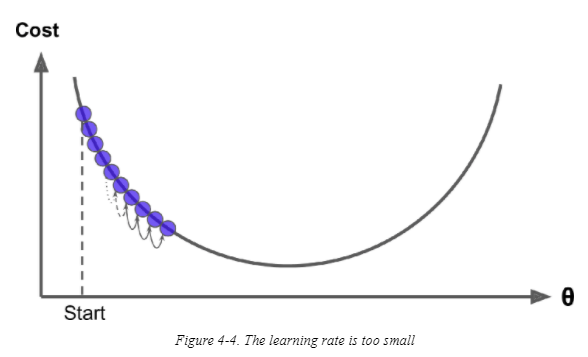

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

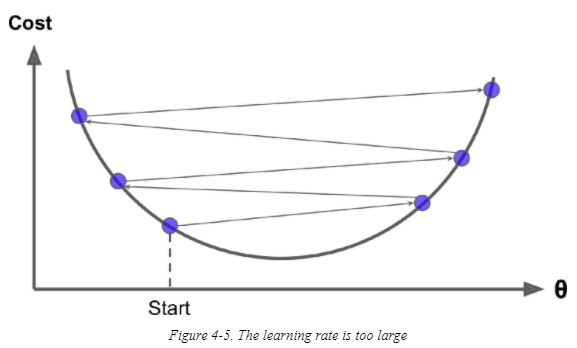

The two main challenges with Gradient Descent are that if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a ***convex function***, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. **This implies that there are no local minima, just one global minimum.** It is also a continuous function with a slope that never changes abruptly, so Gradient Descent is guaranteed to approach arbitrarily close the global minimum (**if you wait long enough and if the learning rate is not too high**).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. 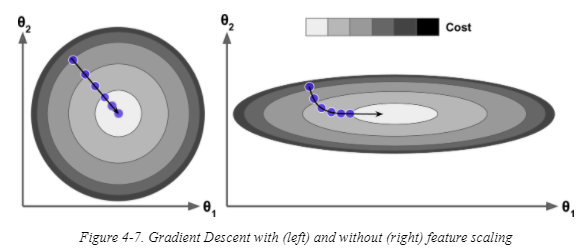

On the left the Gradient Descent algorithm goes straight toward the minimum, thereby **reaching it quickly**, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. **It will eventually reach the minimum, but it will take a long time.**

**Warning**
When using Gradient Descent, ***you should ensure that all features have a similar scale*** (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

And training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: **the more parameters a model has, the more dimensions this space has, and the harder the search is**. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.

# Batch Gradient Descent 
To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter *θj*. In other words, you need to calculate how much the cost function will change if you change *θj* just a little bit. This is called a *partial derivative*.

This equation (Partial derivatives of the cost function) computes the partial derivative of the cost function with regard to parameter *θj*, noted ∂ ∂ θ j MSE(θ).

***∂ ∂ θ j MSE (θ) = 2 m ∑ i = 1 m ( θ ⊺ x ( i ) - y ( i ) ) x j ( i )***

Instead of computing these partial derivatives individually, you can use next equation (Gradient vector of the cost function) to compute them all in one go:

***∇ θ MSE ( θ ) = ∂ ∂ θ 0 MSE ( θ ) ∂ ∂ θ 1 MSE ( θ ) ⋮ ∂ ∂ θ n MSE ( θ ) = 2 m X ⊺ ( X θ - y )***

**Warning**
Notice that this formula involves calculations over the full training set **X**, at each Gradient Descent step! This is why the algorithm is called *Batch Gradient Descent*: it uses the whole batch of training data at every step (actually, *Full Gradient Descent* would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; **training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.**

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play: 5 multiply the gradient vector by η to determine the size of the downhill step (equation Gradient Descent step).

***θ(next step) = θ - η∇θMSE(θ)***

The implementation of this algorithm is shown below:

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


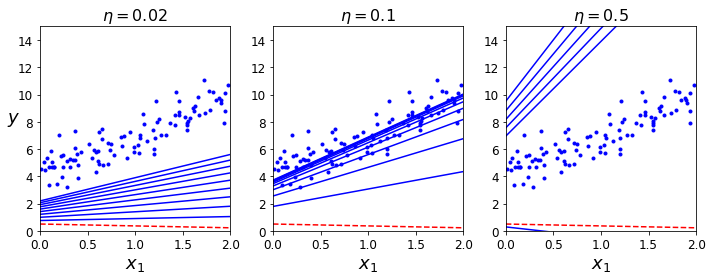

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

To set the number of iterations, it's important to consider that if it is too low, you will still be far away from the optimal solution when the algorithm stops; but is it is too high, you will waste time while the model parameters do not change anymore. **A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)**—because this happens when Gradient Descent has (almost) reached the minimum.

## Convergence Rate

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O (1/ϵ) iterations to reach the optimum within a range of ϵ, depending on the shape of the cost function.


# Stochastic Gradient Descent
The main problem with *Batch Gradient Descent* is the fact that **it uses the whole training set to compute the gradients at every step**, which makes it very slow when the training set is large. 

At the opposite extreme, *Stochastic Gradient Descent* **picks a random instance in the training set at every step and computes the gradients based only on that single instance**. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (Stochastic GD can be implemented as an out-of-core algorithm.

With SGD, the cost function will bounce up and down, decreasing only in average. Over values are good, but not optimal. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. **So once the algorithm stops, the final parameter values are good, but not optimal.**

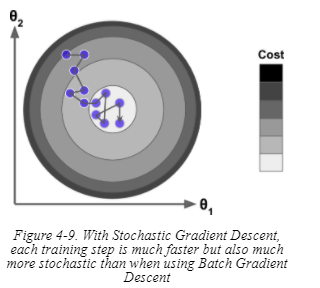


Therefore, **randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum**. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. 

The function that determines the learning rate at each iteration is called the *learning schedule*. 

SGD implementation


In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


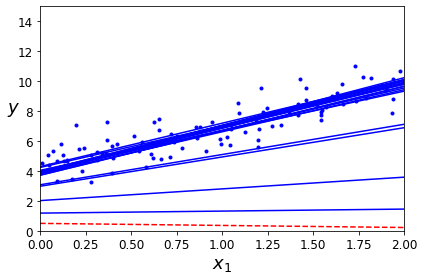

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

First 20 steps of training ^^^^^

By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

** Warning **

When using Stochastic Gradient Descent, **the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum**, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

# Performing Linear Regression with Stochastic Gradient Descent using Scikit-Learn



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42) #1000 epochs, tolerance = 1e-3, learning rate = 0.1, no regularization on penalty=None
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# Mini-batch Gradient Descent 
The last Gradient Descent algorithm it is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), **Mini-batch GD computes the gradients on small random sets of instances called mini-batches**.

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.



In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


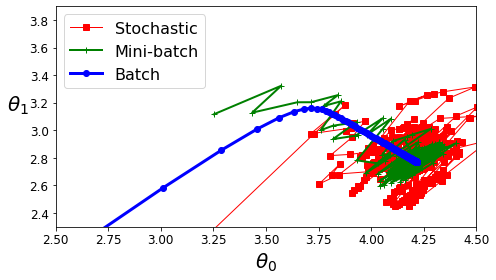

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Comparing the algorithms for Linear Regression (recall that m is the number of training instances and n is the number of features).

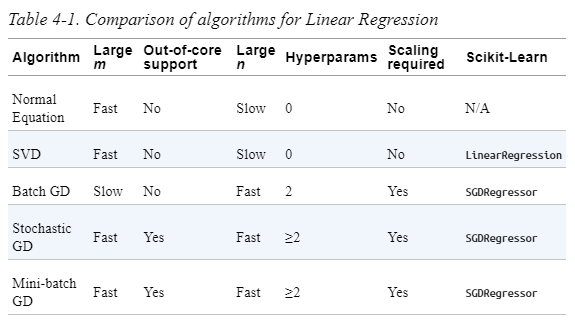

**Note**

There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

#Polynomial Regression 
You can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. 

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


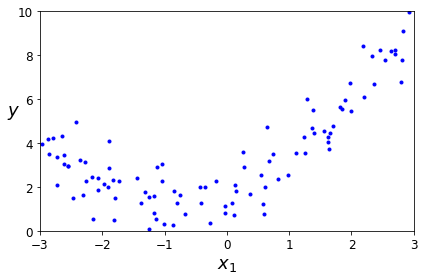

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Adding the square (second-degree polynomial) of each feature in the training set as a new feature using Scikit-Learn' `PolynomialFeatures` class to transform the training data.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

**X_poly** now contains the original feature of **X** plus the square of this feature. 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


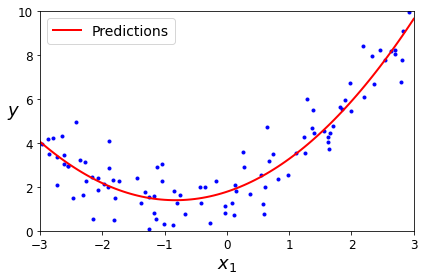

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

The model estimates ***y' = 0.56x^2 + 0.93x + 1.78***, when in fact the original function was ***y = 0.5x^2 + x + 2 + Gaussian noise***, this is not bad.



Note that **when there are multiple features, Polynomial Regression is capable of finding relationships between features** (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b , PolynomialFeatures with degree=3 would not only add the features $a^{2}$ , $a^{3}$ , $b^{2}$, and $b^{3}$, but also the combinations $ab$, $a^{2}b$, and $ab^{2}$.

**Warning**

`PolynomialFeatures`(degree=d) transforms an array containing n features into an array containing $( n + d ) ! d ! n !$ features, where $n!$ is the factorial of $n$, equal to $1 × 2 × 3 × ⋯ × n$. **Beware of the combinatorial explosion of the number of features!**


# Learning Curves
If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.

Next code applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree poolynomial).

Saving figure high_degree_polynomials_plot


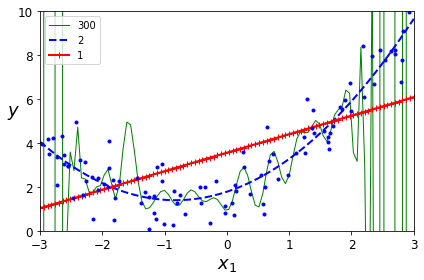

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

The 300-degree polynomial model wiggles around to get as close as possible to the training instances.

This high-degree Polynomial Regression model is severely **overfitting** the training data, while the linear model is **underfitting** it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.

In general you won't know what function generated the data, so in order to decide how complex your model should be you can use cross-validation to get an estimate of a model's generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.



Another way to tell is to look at the *learning curves*: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). **To generate the plots, train the model several times on different sized subsets of the training set.**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


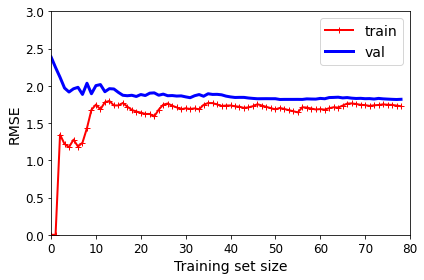

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

*Train data explanation*

This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

*Validation data explanation*

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

***These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.***

**Tip**

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.


Learning curves of a 10th-degree polynomial model on the same data.

Saving figure learning_curves_plot


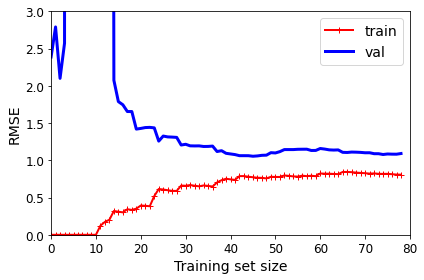

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Although these learning curves look a bit like the previous ones, there are two very important differences:
* The error on the training data is much lower than with the Linear Regression model.
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.


**Tip**

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

# The Bias/Variance Trade-off
A model’s generalization error can be expressed as the sum of three very different errors: 
* Bias 
> This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data. 

* Variance 
> This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data. 

* Irreducible error 
> This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers). 

**Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. **This is why it is called a trade-off.



# Regularized Linear Models
A good way to reduce overfitting is to regularize the model (i.e., to constraint it): **the fewer of freedom it has, the harder it will be for it to overfit the data.** 

* For polynomial models: A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
* For linear models: For a linear model, regularization is typically achieved by constraining the weights of the model. **Ridge Regression, Lasso Regression, and Elastic Net** implement three different ways to constraint the weights.


## Ridge Regression
Also called *Tikhonov regularization*, ) is a regularized version of Linear Regression: a regularization term equal to $α ∑ i = 1 n θ i 2$ is added to the cost function. **This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible**. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

The hyperparameter $α$ controls how much you want to regularize the model. If $α = 0$, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

Ridge Regression cost function:
$J ( θ ) = MSE ( θ ) + α 1 2 ∑ i = 1 n θ i 2$

**It is important to scale the data (e.g., using a StandardScaler ) before performing Ridge Regression, as it is sensitive to the scale of the input features**. This is true of most regularized models.

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


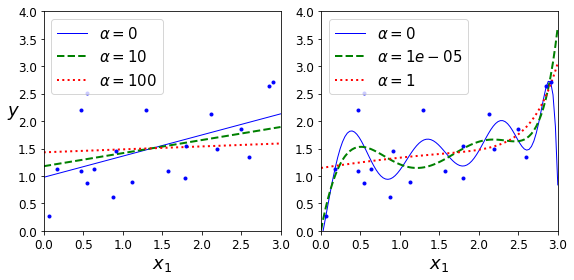

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Previous figure shows several Ridge models trained on some linear data using different $α$ values. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. **Note how increasing $α$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.**



As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.

Ridge Regression closed-form solution 

$θ ^ = ( X ⊺ X + α A ) - 1 X ⊺ y$

Where:
- **A** is the $( n + 1) × ( n + 1)$ identity matrix , except with a 0 in the top-left cell, corresponding to the bias term.

Performing Ridge Regression with Scikit-Learn using a closed-form solution:

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

The `penalty` hyperparameter sets the type of regularization term to use. Specifying `"l2"` indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $ℓ 2$ norm of the weight vector.

## Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (usually simply called Lasso Regression ) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $ℓ 1$ norm of the weight vector instead of half the square of the $ℓ 2$ norm.

Lasso Regression cost function:
$J ( θ ) = MSE ( θ ) + α ∑ i = 1 n θ i$

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_regression_plot


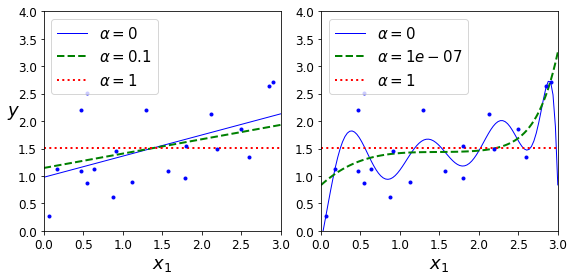

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

An important characteristic of Lasso Regression is that **it tends to eliminate the weights of the least important features** (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a *sparse model* (i.e., with few nonzero feature weights).

**Tip**

To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

Lasso Regression subgradient vector equation:

$g ( θ , J ) = ∇ θ$ 

$MSE ( θ ) + α sign ( θ 1 ) sign ( θ 2 ) ⋮ sign ( θ n )$ 

where 

$sign ( θ i ) = - 1 if θ i < 0 0 if θ i = 0 + 1 if θ i > 0$

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

You can instead use `SGDRegressor(penalty="l1")`

In [ ]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47177422])

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

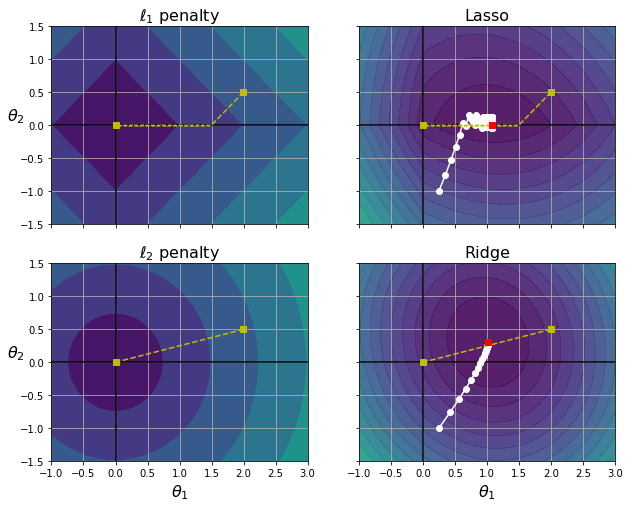

In [6]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

#save_fig("lasso_vs_ridge_plot")
plt.show()

## Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression.

Elastic Net cost function

$J ( θ ) = MSE ( θ ) + r α ∑ i = 1 n θ i + 1 - r 2 α ∑ i = 1 n θ i 2$

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

**Note**
It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.
* If you suspect that only a few features are useful, you should prefer **Lasso or Elastic Net** because **they tend to reduce the useless features weights down to zero.** 
* Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

## Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. 

Explanation: As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. **With early stopping you just stop training as soon as the validation error reaches the minimum.**

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


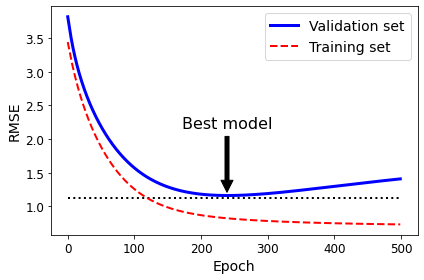

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

**Tip** 

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

# Logistic Regression
*Logistic Regression* (also called Logit Regression ) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the *positive class*, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the *negative class*, labeled “0”). This makes it a binary classifier.

## Estimating Probabilities
A Logistic Regression model computes a weighted sum of the inputs features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result, as seen in the next equation **Logistic Regression model estimated probability (vectorized form)**:

$p ^ = h θ ( x ) = σ ( x ⊺ θ )$

The logistic—noted $σ$ (·)—is a *sigmoid function* (i.e., S -shaped) that outputs a number between 0 and 1.
It is defined in the following equation **Logistic function**:

$σ ( t ) = 1 1 + exp ( - t )$



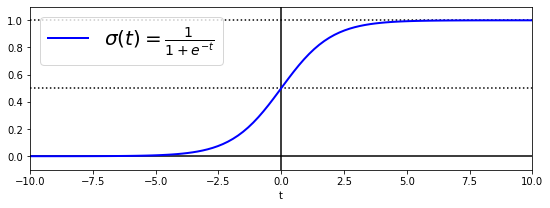

In [8]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

Once the Logistic Regression model has estimated the probability $p ^ = h θ ( x )$ that an instance $x$ belongs to the positive class, it can make its prediction $ŷ$ easily, as shown in the equation below **Logistic Regression model prediction**:

$y ^ = 0$ if $p ^ < 0.5$ 

and 

$1$ if $p ^ ≥ 0.5$

Notice that $σ ( t ) < 0.5$ when $t < 0$, and $σ ( t ) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression model predicts $1$ if $x ⊺ θ$ is positive and $0$ if it is negative.

## Training and Cost Function
The objective of training is to set the parameter vector *$θ$* so that the model estimates high probabilities for positive instances $( y = 1)$ and low probabilities for negative instances $( y = 0)$. This idea is captured by the cost function shown below (**Cost function of a single training instance**):

$c ( θ ) = - log ( p ^ )$ if $y = 1$ 

$- log ( 1 - p ^ )$ if $y=0$


The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the *log loss*, shown in the following equation **Logistic Regression cost function (log loss)**

$J ( θ ) = - 1 m ∑ i = 1 m y ( i ) l o g p ^ ( i ) + ( 1 - y ( i ) ) l o g 1 - p ^ ( i )$

